<a href="https://colab.research.google.com/github/Lubitza963/dataProjects/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

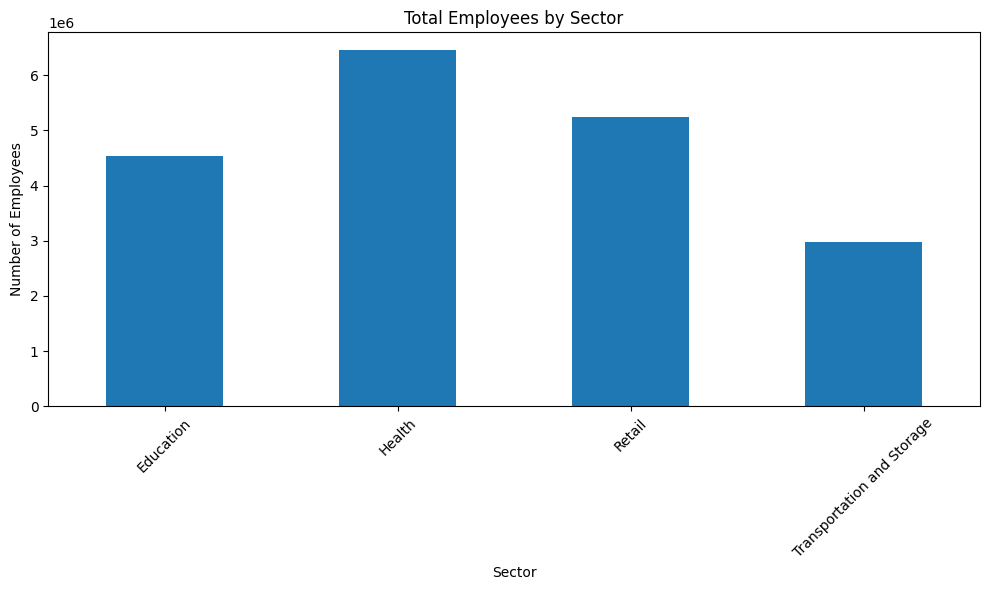

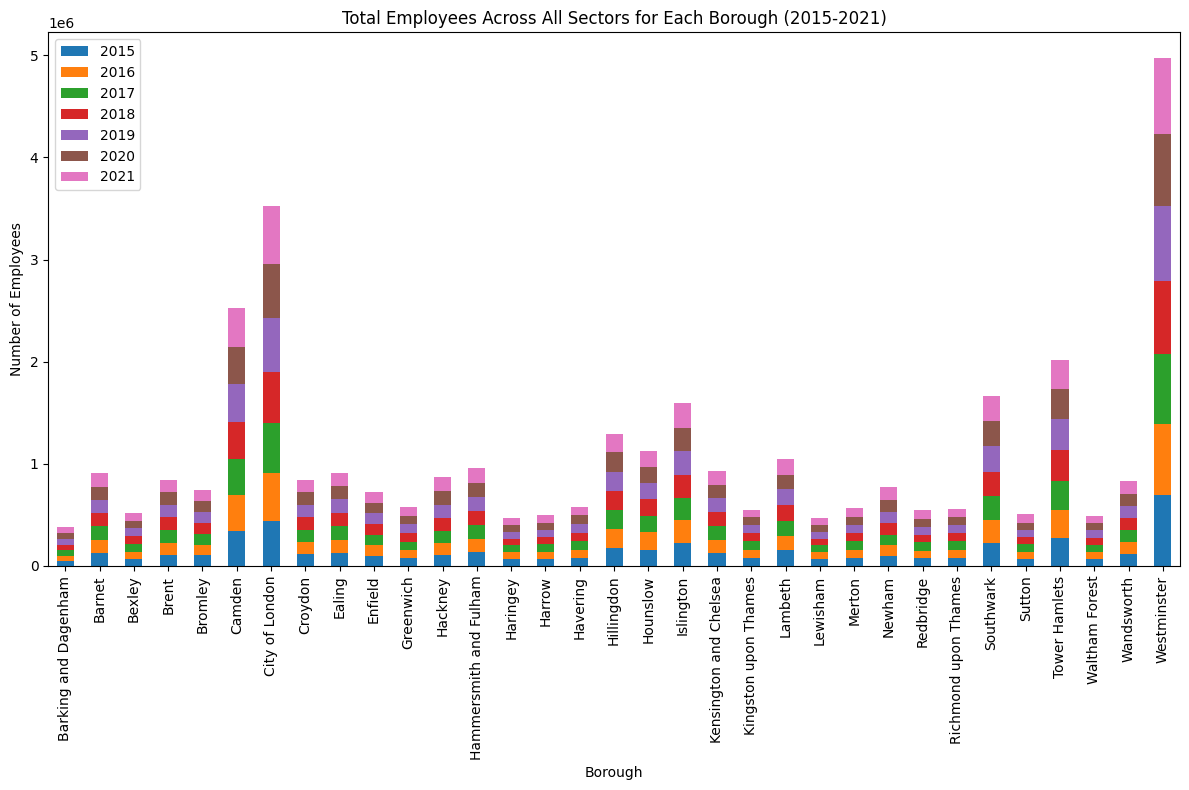

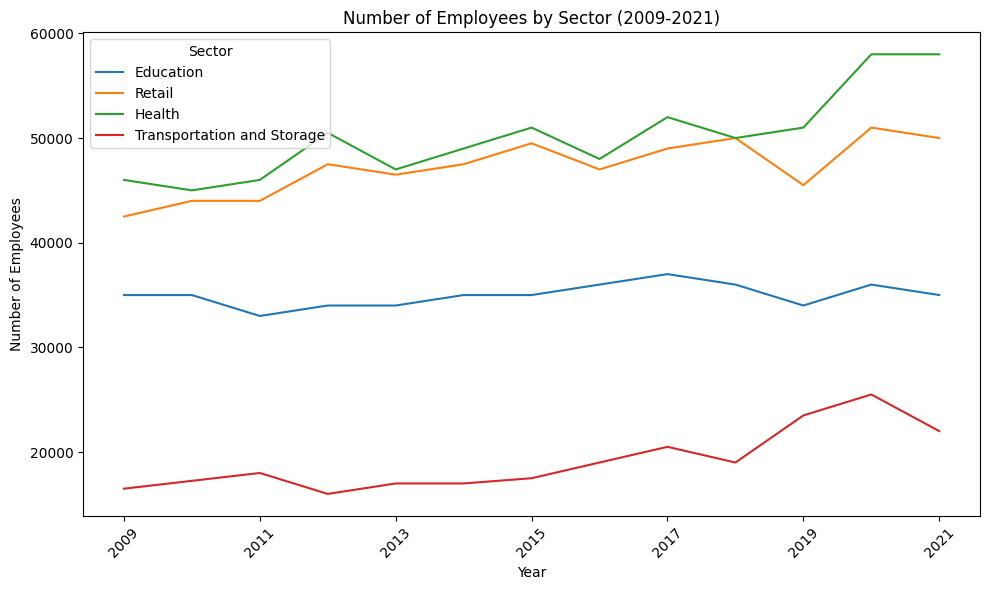

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '23_borough_by_sector.xlsx'
df = pd.read_excel(file_path)

# Visual 1: Column Chart - Total number of employees for selected sectors
def column_chart_total_employees(df):
    # Filter for relevant sectors
    selected_sectors = ['Education', 'Retail', 'Health', 'Transportation and Storage', 'Accommodation and food service activities']

    # Filter rows for the selected sectors
    sector_df_filtered = df[df['Sector'].isin(selected_sectors)]

    # Specify the time range of interest
    time_range = [str(year) for year in range(2009, 2022)]

    # Calculate the total number of employees across all boroughs for the selected sectors
    sector_totals_filtered = sector_df_filtered.groupby('Sector')[time_range].sum().sum(axis=1)

    # Convert the result to a DataFrame for easy plotting
    sector_totals_filtered_df = pd.DataFrame(sector_totals_filtered, columns=['Total Employees'])

    # Plotting the total number of employees for the selected sectors in a column chart
    sector_totals_filtered_df.plot(kind='bar', figsize=(10, 6), legend=False)
    plt.title('Total Employees by Sector')
    plt.ylabel('Number of Employees')
    plt.xlabel('Sector')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visual 2: Stacked Column Chart - Total employees across all sectors for each Borough between 2015–2021
def stacked_column_chart(df):
    # Specify the years of interest
    years = [str(year) for year in range(2015, 2022)]

    # Group by Borough and sum the total number of employees for each borough per year
    borough_totals = df.groupby('Borough')[years].sum()

    # Plotting the stacked column chart for total employees by borough between 2015-2021
    borough_totals.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title('Total Employees Across All Sectors for Each Borough (2015-2021)')
    plt.ylabel('Number of Employees')
    plt.xlabel('Borough')
    plt.xticks(rotation=90)  # Make the x-tick labels vertical
    plt.tight_layout()
    plt.show()

# Visual 3: Line Graph - Number of employees for sectors against time (2009–2021) for specific boroughs
def line_graph_sectors(df):
    selected_boroughs = ['Enfield', 'Croydon', 'Hammersmith and Fulham', 'Barking and Dagenham']
    selected_sectors = ['Education', 'Retail', 'Health', 'Transportation and Storage']

    # Filter the dataset for the selected boroughs and sectors
    filtered_df = df[df['Borough'].isin(selected_boroughs) & df['Sector'].isin(selected_sectors)]

    # Specify the years of interest
    years = [str(year) for year in range(2009, 2022)]

    # Group by sector and sum across the boroughs for each year
    sector_totals = filtered_df.groupby('Sector')[years].sum()

    # Plotting the line graphs for each sector
    plt.figure(figsize=(10, 6))
    for sector in selected_sectors:
        sector_totals.loc[sector].plot(label=sector)

    plt.title('Number of Employees by Sector (2009-2021)')
    plt.ylabel('Number of Employees')
    plt.xlabel('Year')
    plt.xticks(rotation=45)
    plt.legend(title='Sector')
    plt.tight_layout()
    plt.show()

# Execute all visuals in order
column_chart_total_employees(df)
stacked_column_chart(df)
line_graph_sectors(df)
